In [2]:
import pandas as pd
import folium

In [43]:
df = pd.read_csv('/home/smebellis/ece5831_final_project/processed_data/clustered_dataset.csv')

In [36]:
df = df.sample(n=10000, random_state=42)

In [37]:
# Filter for a specific cluster (e.g., Cluster 5)
cluster_to_visualize = 'Cluster 4'
df_filtered = df[df['DISTRICT_CLUSTER'] == cluster_to_visualize]

In [38]:
# Get the minimum and maximum DOM values for this cluster
min_dom = df_filtered['DOM'].min()
max_dom = df_filtered['DOM'].max()

In [39]:
# Calculate the centroid (mean latitude and longitude) of the cluster
centroid_lat = df_filtered['START_LAT'].mean()
centroid_long = df_filtered['START_LONG'].mean()

In [40]:
# Initialize a Folium map centered around the mean coordinates
m = folium.Map(location=[41.14611, -8.617599], zoom_start=14)

In [41]:
# Define a colormap based on DOM values
colormap = folium.LinearColormap(colors=['lightblue', 'blue', 'darkblue'], vmin=min_dom, vmax=max_dom)


In [42]:
# Plot each starting point of the selected cluster with its DOM value
for i, row in df_filtered.iterrows():
    lat = row['START_LAT']
    long = row['START_LONG']
   
    dom = row['DOM']
    
    # Add a marker for each starting point with a color corresponding to the DOM value
    folium.CircleMarker(
        location=[lat, long],  # Latitude, Longitude
        radius=2,
        color='blue',
        fill=True,
        fill_color='lightblue',
        fill_opacity=0.7,
        tooltip=f'Cluster: {row["CLUSTER"]}, DOM: {dom:.2f}'  # Tooltip with Cluster ID and DOM value
    ).add_to(m)

# Add a circle around the centroid of the cluster
folium.Circle(
    location=[centroid_lat, centroid_long],
    radius=500,  # Set the radius (in meters) as per your requirement
    color='green',
    fill=True,
    fill_opacity=0.1,
    popup=f'Cluster Centroid: {cluster_to_visualize}'
).add_to(m)

# Add the color legend to the map
colormap.caption = 'Degree of Membership (DOM)'
m.add_child(colormap)

In [ ]:
# To display it directly in a notebook (if you are using one):
from IPython.display import display
display(m)

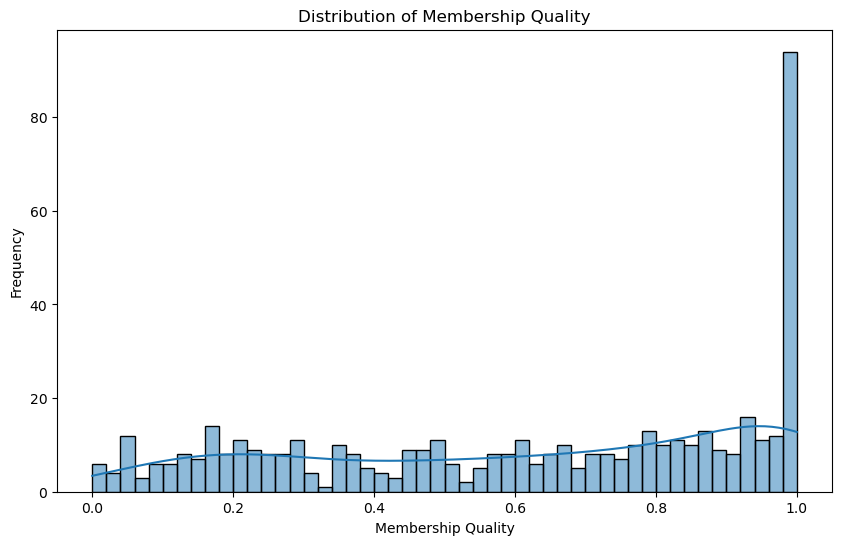

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Membership Quality
plt.figure(figsize=(10, 6))
sns.histplot(df["MEMBERSHIP_QUALITY"], bins=50, kde=True)
plt.title("Distribution of Membership Quality")
plt.xlabel("Membership Quality")
plt.ylabel("Frequency")
plt.show()